<h1 style="font-family: 'Poppins', sans-serif; color: #afc3cc; font-size: 36px; text-align: center;">RAINFALL PREDICTION</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,\
                            precision_score, recall_score, roc_curve,\
                            roc_auc_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

SEED = 41

### Importing Data

In [2]:
df = pd.read_csv('weatherAUS.csv')
pd.set_option("display.max_columns", None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Overview of Dataset

In [20]:
df.shape

(145460, 23)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [89]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [22]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [23]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

In [92]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


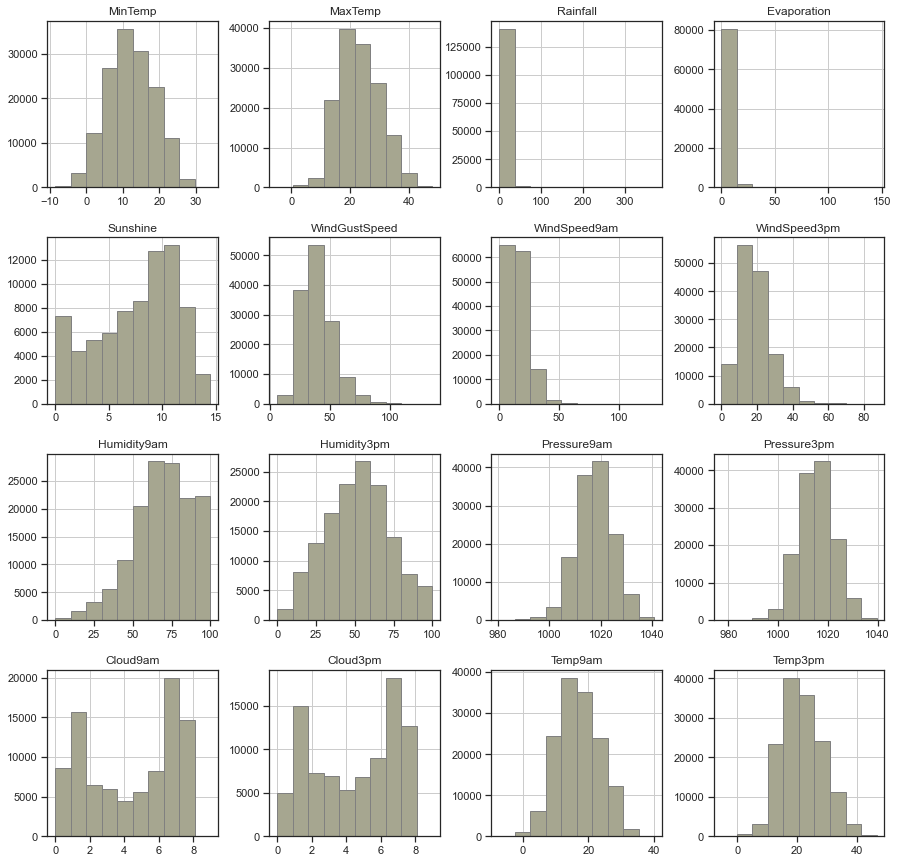

In [24]:
df.hist(figsize=(15,15), color=[lighten_color('#70705a', 0.65) ],
            edgecolor='grey')
plt.show()

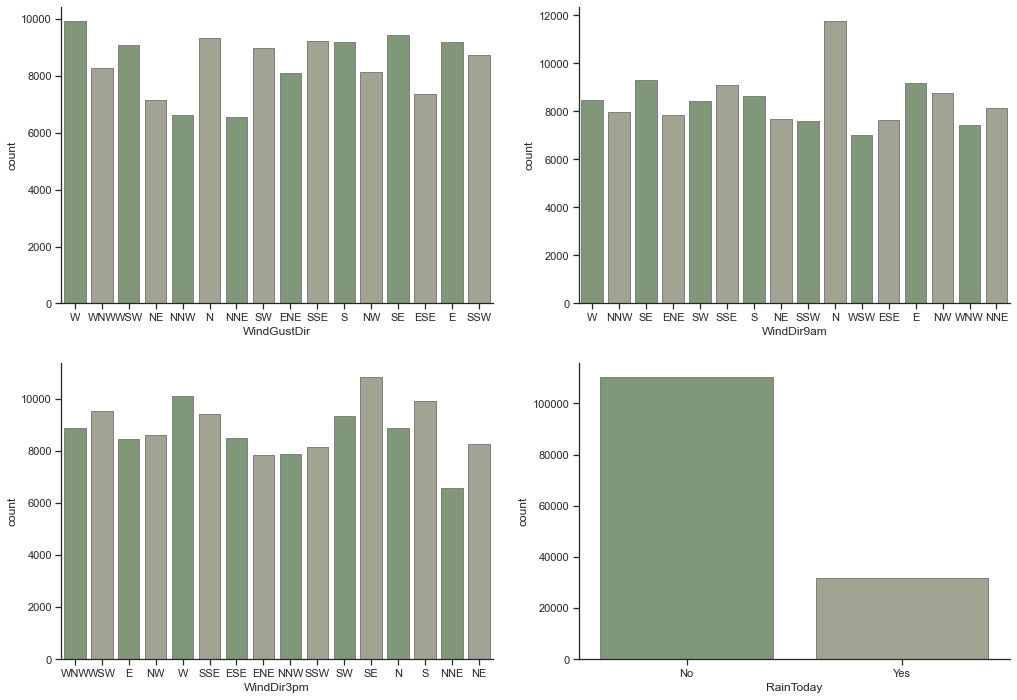

In [25]:
features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

plt.figure(figsize=(17, 12))
sns.set(font_scale= 1)
sns.set_style('ticks')

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=feature, palette=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65)],
            edgecolor='grey')
    
sns.despine()

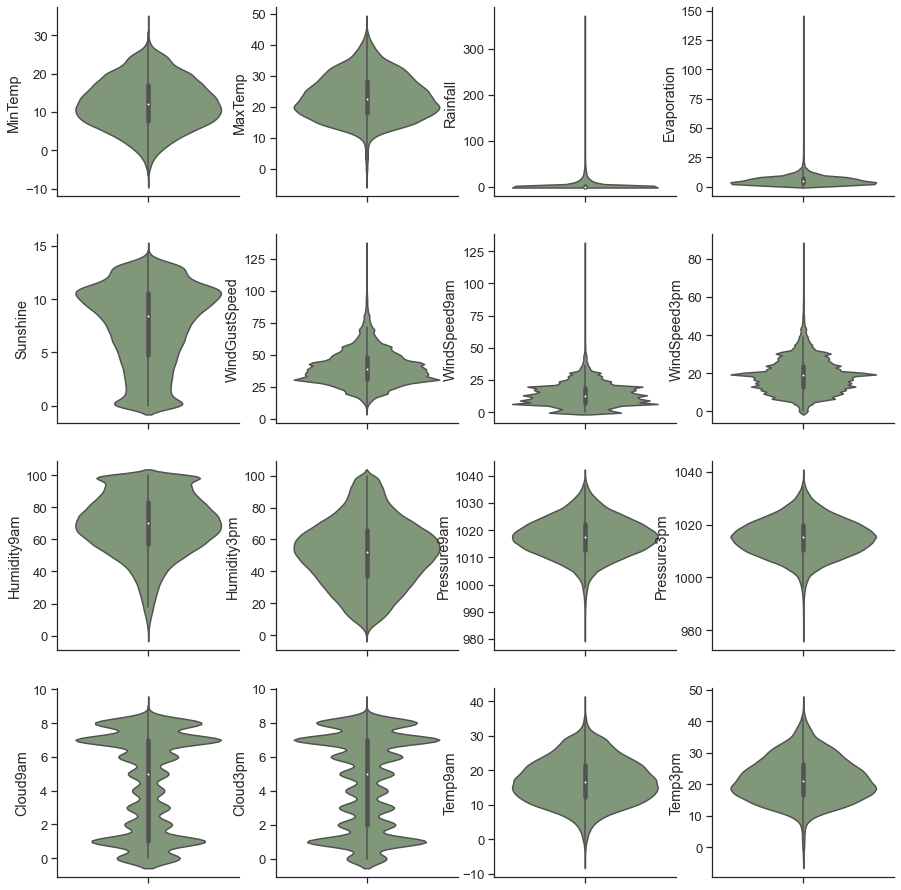

In [5]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

plt.figure(figsize=(15, 16))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.violinplot(data=df, y=feature, palette=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65)])  
    
sns.despine()

### Dropping rows with null values


In [26]:
df.dropna(inplace=True)

### Distribution of target column RainTomorrow

Analysis of RainTomorrow Column :
No Rain Tomorrow:  43993 78.0% 
Rain Tomorrow:  12427 22.0% 


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

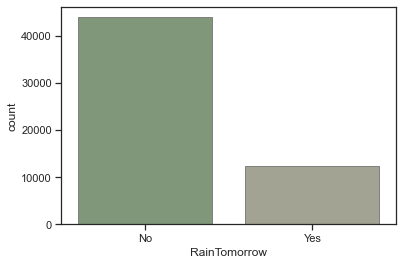

In [27]:
print("Analysis of RainTomorrow Column :")
print("No Rain Tomorrow: ", df['RainTomorrow'].value_counts()[0], "{:.1f}% ".format(df[df['RainTomorrow'] == 'No'].shape[0] / df.shape[0]*100))
print("Rain Tomorrow: ", df['RainTomorrow'].value_counts()[1], "{:.1f}% ".format(df[df['RainTomorrow'] == 'Yes'].shape[0] / df.shape[0]*100))
sns.countplot(df['RainTomorrow'], palette=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65) ],
            edgecolor='grey')

### Univariate Analysis wrt RainTomorrow (target)

Text(0, 0.5, 'Days of Rain Tomorrow')

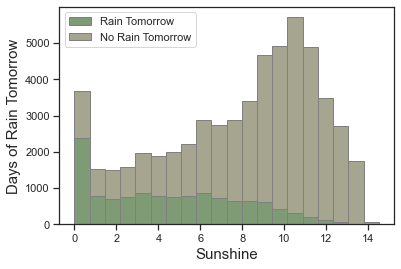

In [72]:
plt.hist(x=[df['Sunshine'][df['RainTomorrow'] == 'Yes'], 
            df['Sunshine'][df['RainTomorrow'] == 'No']],
            stacked=True, 
            label=['Rain Tomorrow', 'No Rain Tomorrow'], 
            bins=20, 
            color=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65) ],
            edgecolor='grey')
plt.legend()
plt.xlabel('Sunshine', fontsize=15)
plt.ylabel('Days of Rain Tomorrow', fontsize=15)

Text(0, 0.5, 'Days of Rain Tomorrow')

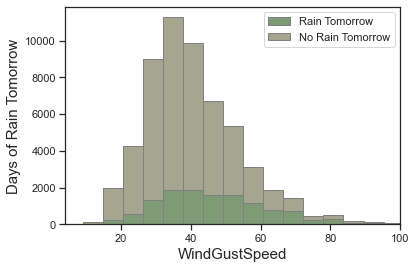

In [73]:
plt.hist(x=[df['WindGustSpeed'][df['RainTomorrow'] == 'Yes'], 
            df['WindGustSpeed'][df['RainTomorrow'] == 'No']],
            stacked=True, 
            label=['Rain Tomorrow', 'No Rain Tomorrow'], 
            bins=20, 
            color=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65) ],
            edgecolor='grey')
plt.legend()
plt.xlim(4,100)
plt.xlabel('WindGustSpeed', fontsize=15)
plt.ylabel('Days of Rain Tomorrow', fontsize=15)

In [111]:
(mu, sigma) = norm.fit(df.loc[df['RainTomorrow'] == 'Yes', 'WindSpeed9am'])
print(
    'Rain Tomorrow: Average Morning Wind Speed = {:.1f}  and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df.loc[df['RainTomorrow'] == 'No', 'WindSpeed9am'])
print('No Rain Tomorrow: Average Morning Wind Speed = {:.1f}  and standard deviation = {:.1f}'.format(
    mu, sigma))

Rain Tomorrow: Average Morning Wind Speed = 17.0  and standard deviation = 9.0
No Rain Tomorrow: Average Morning Wind Speed = 15.3  and standard deviation = 8.1


[Text(0.5, 0, 'Rain Today'), Text(0, 0.5, '')]

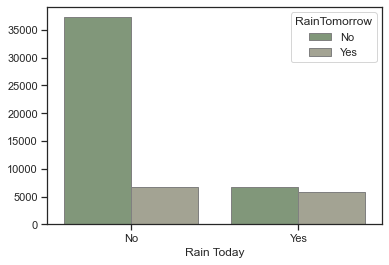

In [79]:
sns.countplot('RainToday', data=df, palette=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65) ], edgecolor="grey",
              hue="RainTomorrow").set(xlabel="Rain Today", ylabel="")

Text(0, 0.5, 'Days of Rain Tomorrow')

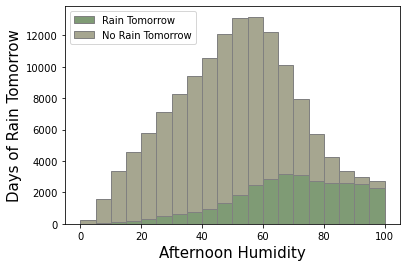

In [5]:
plt.hist(x=[df['Humidity3pm'][df['RainTomorrow'] == 'Yes'], 
            df['Humidity3pm'][df['RainTomorrow'] == 'No']],
            stacked=True, 
            label=['Rain Tomorrow', 'No Rain Tomorrow'], 
            bins=20, 
            color=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65) ],
            edgecolor='grey')
plt.legend()
plt.xlabel('Afternoon Humidity', fontsize=15)
plt.ylabel('Days of Rain Tomorrow', fontsize=15)

[Text(0.5, 0, 'Morning Pressure'), Text(0, 0.5, '')]

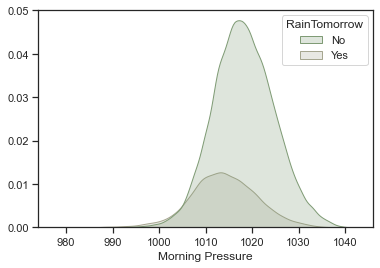

In [86]:
sns.kdeplot('Pressure9am', data=df, hue="RainTomorrow", palette=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65)],shade=True).set(xlabel="Morning Pressure", ylabel="")

[Text(0.5, 0, 'Morning Pressure'), Text(0, 0.5, '')]

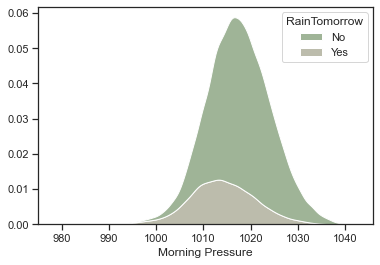

In [107]:


sns.kdeplot('Pressure9am', data=df, hue="RainTomorrow", multiple="stack", palette=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65)],shade=True).set(xlabel="Morning Pressure", ylabel="")

Text(0, 0.5, 'Days of Rain Tomorrow')

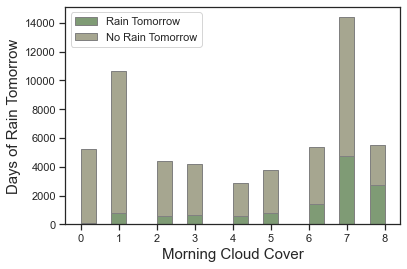

In [29]:
plt.hist(x=[df['Cloud9am'][df['RainTomorrow'] == 'Yes'], 
            df['Cloud9am'][df['RainTomorrow'] == 'No']],
            stacked=True, 
            label=['Rain Tomorrow', 'No Rain Tomorrow'], 
            bins=20, 
            color=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65) ],
            edgecolor='grey')
plt.legend()
plt.xlabel('Morning Cloud Cover', fontsize=15)
plt.ylabel('Days of Rain Tomorrow', fontsize=15)

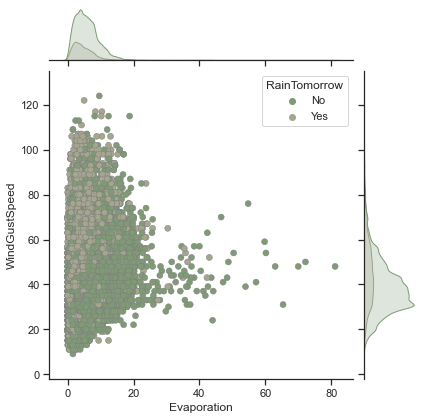

In [92]:
sns.jointplot(x='Evaporation',y='WindGustSpeed',data=df, hue='RainTomorrow', palette=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65) ],
            edgecolor='grey')

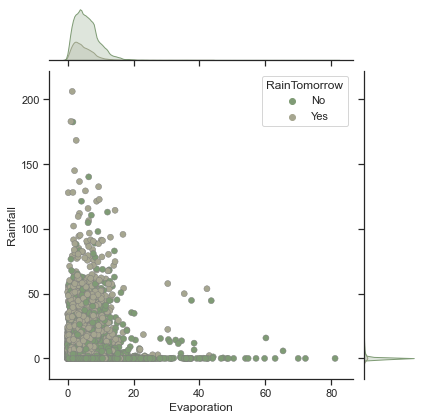

In [96]:
sns.jointplot(x='Evaporation',y='Rainfall', data=df, hue='RainTomorrow', palette=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65) ],
            edgecolor='grey')

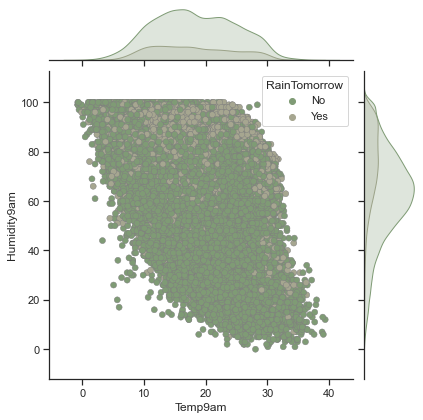

In [97]:
sns.jointplot(x='Temp9am',y='Humidity9am',data=df, hue='RainTomorrow', palette=[lighten_color('#94ac8c', 1.2),lighten_color('#70705a', 0.65) ],
            edgecolor='grey')

<AxesSubplot:>

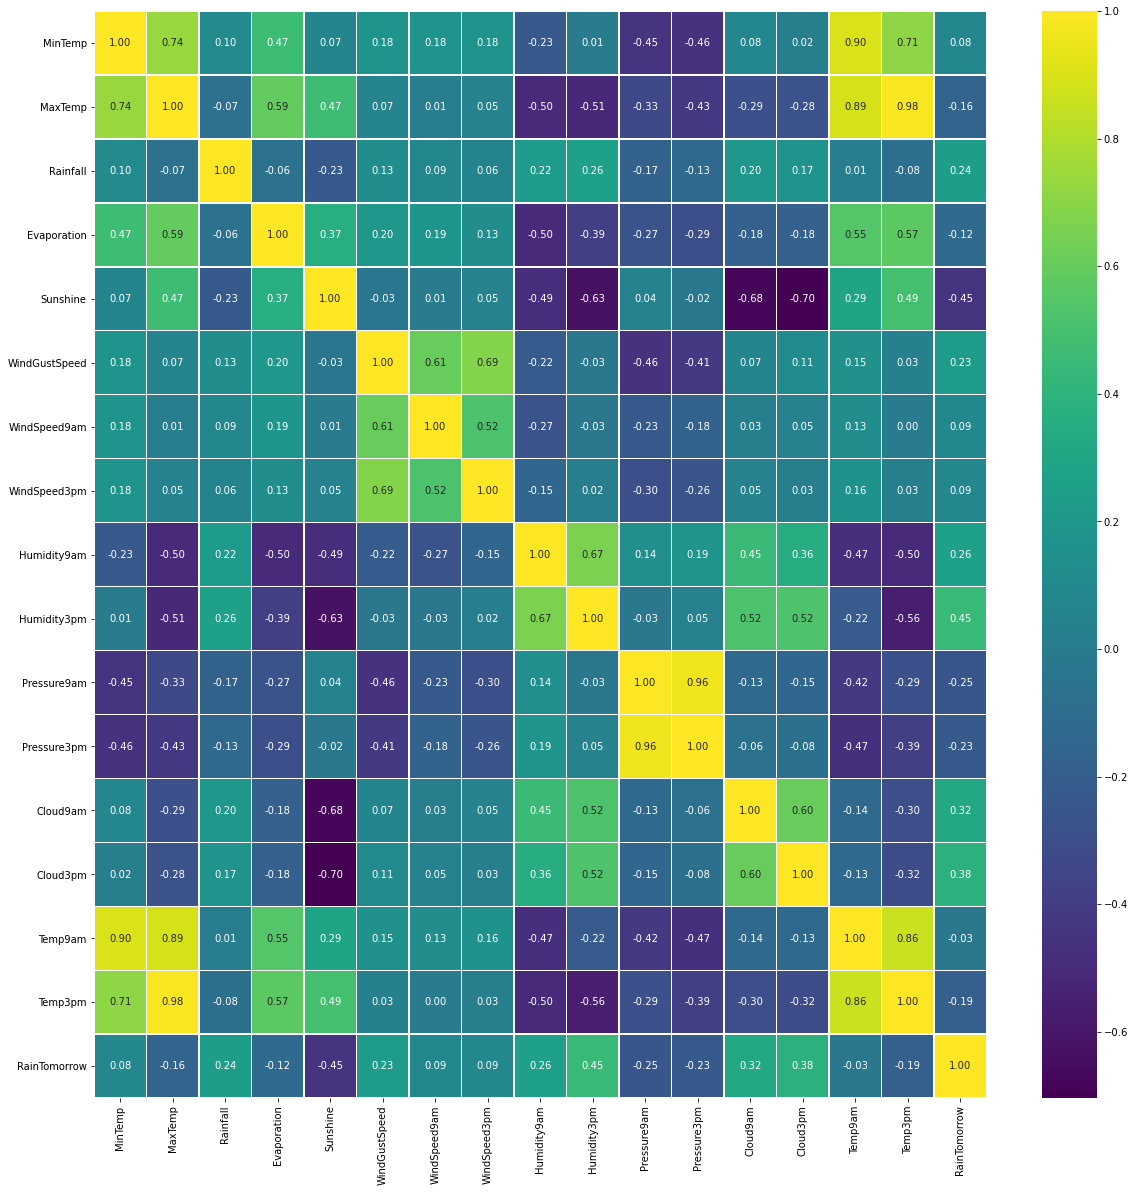

In [5]:
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), linewidths=0.5, annot=True, fmt=".2f", cmap = 'viridis')

In [4]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])